In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [3]:
train.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [4]:
train.Business_Sourced.value_counts()

0    6260
1    3267
Name: Business_Sourced, dtype: int64

In [5]:
test = pd.read_csv('test.csv')
test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [145]:
test.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [6]:
test.shape

(5045, 22)

In [7]:
train[train.Manager_DOJ.isna()].Business_Sourced.value_counts()

0    447
1    236
Name: Business_Sourced, dtype: int64

In [8]:
train

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,FIN1009523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,FIN1009524,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,FIN1009525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,FIN1009526,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
combined = pd.concat([train,test], ignore_index=True)
combined.shape

(14572, 23)

In [10]:
combined.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN              131
Applicant_Gender                 89
Applicant_BirthDate              96
Applicant_Marital_Status        103
Applicant_Occupation           2225
Applicant_Qualification         130
Manager_DOJ                    1507
Manager_Joining_Designation    1507
Manager_Current_Designation    1507
Manager_Grade                  1507
Manager_Status                 1507
Manager_Gender                 1507
Manager_DoB                    1507
Manager_Num_Application        1507
Manager_Num_Coded              1507
Manager_Business               1507
Manager_Num_Products           1507
Manager_Business2              1507
Manager_Num_Products2          1507
Business_Sourced               5045
dtype: int64

In [11]:
combined.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced               float64
dtype: object

In [12]:
combined.Applicant_BirthDate = combined.Applicant_BirthDate.astype('str')
combined.Application_Receipt_Date = combined.Application_Receipt_Date.astype('str')
combined.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced               float64
dtype: object

In [13]:
from datetime import datetime
def age(x):
    if x['Applicant_BirthDate']!='nan':
        return int(abs((datetime.strptime(x['Application_Receipt_Date'], '%m/%d/%Y')-datetime.strptime(x['Applicant_BirthDate'],'%m/%d/%Y')).days/365.25))
    return None
combined['Age'] = combined.apply(age, axis=1)

In [14]:
combined.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN              131
Applicant_Gender                 89
Applicant_BirthDate               0
Applicant_Marital_Status        103
Applicant_Occupation           2225
Applicant_Qualification         130
Manager_DOJ                    1507
Manager_Joining_Designation    1507
Manager_Current_Designation    1507
Manager_Grade                  1507
Manager_Status                 1507
Manager_Gender                 1507
Manager_DoB                    1507
Manager_Num_Application        1507
Manager_Num_Coded              1507
Manager_Business               1507
Manager_Num_Products           1507
Manager_Business2              1507
Manager_Num_Products2          1507
Business_Sourced               5045
Age                              96
dtype: int64

In [15]:
combined.drop(['Applicant_BirthDate'],axis=1,inplace=True)
combined.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Age
0,FIN1000001,842001,4/16/2007,844120.0,M,M,Others,Graduate,11/10/2005,Level 1,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0,35.0
1,FIN1000002,842001,4/16/2007,844111.0,M,S,Others,Class XII,11/10/2005,Level 1,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0,24.0
2,FIN1000003,800001,4/16/2007,844101.0,M,M,Business,Class XII,5/27/2006,Level 1,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0,41.0
3,FIN1000004,814112,4/16/2007,814112.0,M,S,Salaried,Class XII,8/21/2003,Level 1,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0,19.0
4,FIN1000005,814112,4/16/2007,815351.0,M,M,Others,Class XII,5/8/2006,Level 1,...,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0,21.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

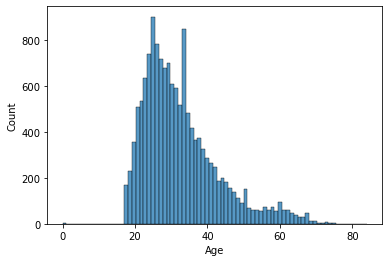

In [16]:
sns.histplot(combined.Age)

<AxesSubplot:xlabel='Age'>

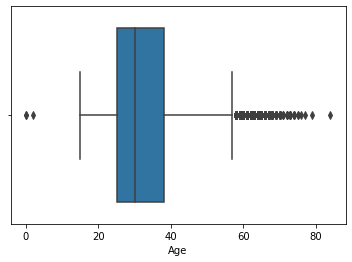

In [17]:
sns.boxplot(data=combined, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

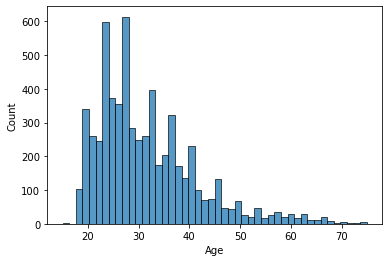

In [18]:
sns.histplot(data=combined[combined.Business_Sourced==0],x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

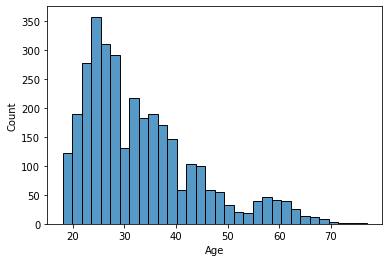

In [20]:
sns.histplot(data=combined[combined.Business_Sourced==1],x='Age')

In [21]:
combined.drop(['Applicant_City_PIN','Office_PIN'], axis=1, inplace=True)

In [22]:
combined

,ID,Application_Receipt_Date,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Age
0,FIN1000001,4/16/2007,M,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0,35.0
1,FIN1000002,4/16/2007,M,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0,24.0
2,FIN1000003,4/16/2007,M,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0,41.0
3,FIN1000004,4/16/2007,M,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0,19.0
4,FIN1000005,4/16/2007,M,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,...,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,FIN1014568,1/1/2009,F,M,Others,Graduate,12/2/2008,Level 2,Level 2,3.0,...,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.0
14568,FIN1014569,1/1/2009,M,M,Others,Graduate,12/2/2008,Level 2,Level 2,3.0,...,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN,59.0
14569,FIN1014570,1/1/2009,M,M,Business,Class XII,12/2/2008,Level 2,Level 2,3.0,...,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN,31.0
14570,FIN1014571,1/1/2009,M,M,NaN,Graduate,9/25/2008,Level 2,Level 2,3.0,...,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0,NaN,23.0


In [23]:
cat = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',
       'Manager_Joining_Designation','Manager_Current_Designation','Manager_Status','Manager_Gender']

In [24]:
from sklearn.preprocessing import LabelEncoder
for _ in cat:
    le = LabelEncoder()
    combined[_] = le.fit_transform(combined[_])

In [25]:
combined.Applicant_Gender.value_counts()

1    11079
0     3404
2       89
Name: Applicant_Gender, dtype: int64

In [26]:
combined.isna().sum()

ID                                0
Application_Receipt_Date          0
Applicant_Gender                  0
Applicant_Marital_Status          0
Applicant_Occupation              0
Applicant_Qualification           0
Manager_DOJ                    1507
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                  1507
Manager_Status                    0
Manager_Gender                    0
Manager_DoB                    1507
Manager_Num_Application        1507
Manager_Num_Coded              1507
Manager_Business               1507
Manager_Num_Products           1507
Manager_Business2              1507
Manager_Num_Products2          1507
Business_Sourced               5045
Age                              96
dtype: int64

In [27]:
#combining dob and doj and label encoding them for managers
combined['DOB_DOJ'] = combined['Manager_DoB'].astype('str') + '_' + combined['Manager_DOJ'].astype('str')
le = LabelEncoder()
combined['DOB_DOJ'] = le.fit_transform(combined['DOB_DOJ'])
combined['DOB_DOJ'].value_counts()

1833    1507
1393      46
1051      44
1266      36
551       34
        ... 
297        1
1205       1
223        1
563        1
664        1
Name: DOB_DOJ, Length: 1834, dtype: int64

In [28]:
combined.drop(['Manager_DoB','Manager_DOJ'],axis=1,inplace=True)

In [29]:
count = {}
for _, row in combined.iterrows():
    count[row['Application_Receipt_Date']] = count.get(row['Application_Receipt_Date'],0) + 1

In [30]:
combined.shape

(14572, 20)

In [31]:
prev_date = 0
dayrank = []
daycount = []
daypct = []
for _, row in combined.iterrows():
    curr_date = row['Application_Receipt_Date']
    if curr_date!=prev_date:
        rank = 1
        prev_date = curr_date
    else:
        rank +=1
    dayrank.append(rank)
    daycount.append(count[curr_date])
    daypct.append(float(rank)/count[curr_date])
combined['dayrank'] =  dayrank[:]
combined['daycount'] = daycount[:]
combined['daypct'] = daypct[:]

In [32]:
combined.drop(['Application_Receipt_Date'],axis=1,inplace=True)

In [33]:
combined.shape

(14572, 22)

In [34]:
train = combined[~(combined.Business_Sourced.isna())]
test = combined[combined.Business_Sourced.isna()]

In [35]:
train.isna().sum()

ID                               0
Applicant_Gender                 0
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                  683
Manager_Status                   0
Manager_Gender                   0
Manager_Num_Application        683
Manager_Num_Coded              683
Manager_Business               683
Manager_Num_Products           683
Manager_Business2              683
Manager_Num_Products2          683
Business_Sourced                 0
Age                             73
DOB_DOJ                          0
dayrank                          0
daycount                         0
daypct                           0
dtype: int64

In [174]:
#combined.drop(['Manager_Grade','Manager_Num_Coded','Manager_Num_Application'],axis=1,inplace=True)

In [36]:
train['Manager_Num_Products2'] = train['Manager_Num_Products'] - train['Manager_Num_Products2']
train['Manager_Business2'] = train['Manager_Business'] - train['Manager_Business2']
test['Manager_Num_Products2'] = test['Manager_Num_Products'] - test['Manager_Num_Products2']
test['Manager_Business2'] = test['Manager_Business'] - test['Manager_Business2']

<ipython-input-36-14ed45c583ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Manager_Num_Products2'] = train['Manager_Num_Products'] - train['Manager_Num_Products2']
<ipython-input-36-14ed45c583ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Manager_Business2'] = train['Manager_Business'] - train['Manager_Business2']
<ipython-input-36-14ed45c583ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [37]:
test

,ID,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,...,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Age,DOB_DOJ,dayrank,daycount,daypct
9527,FIN1009528,1,2,2,8,0,0,2.0,1,0,...,0.0,0.0,0.0,0.0,NaN,25.0,214,1,10,0.100000
9528,FIN1009529,1,1,2,8,0,0,2.0,1,1,...,0.0,0.0,0.0,0.0,NaN,40.0,766,2,10,0.200000
9529,FIN1009530,1,2,5,8,8,5,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,23.0,1833,3,10,0.300000
9530,FIN1009531,1,2,2,8,8,5,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,37.0,1833,4,10,0.400000
9531,FIN1009532,1,2,5,9,1,1,3.0,0,1,...,97352.0,3.0,0.0,0.0,NaN,29.0,1223,5,10,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,FIN1014568,0,1,1,8,1,1,3.0,1,1,...,0.0,0.0,0.0,0.0,NaN,42.0,1057,95,99,0.959596
14568,FIN1014569,1,1,1,8,1,1,3.0,1,1,...,0.0,0.0,0.0,0.0,NaN,59.0,1057,96,99,0.969697
14569,FIN1014570,1,1,0,7,1,1,3.0,1,1,...,0.0,0.0,0.0,0.0,NaN,31.0,1057,97,99,0.979798
14570,FIN1014571,1,1,5,8,1,1,3.0,1,1,...,15347.0,1.0,0.0,0.0,NaN,23.0,1244,98,99,0.989899


In [38]:
train.isna().sum()

ID                               0
Applicant_Gender                 0
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                  683
Manager_Status                   0
Manager_Gender                   0
Manager_Num_Application        683
Manager_Num_Coded              683
Manager_Business               683
Manager_Num_Products           683
Manager_Business2              683
Manager_Num_Products2          683
Business_Sourced                 0
Age                             73
DOB_DOJ                          0
dayrank                          0
daycount                         0
daypct                           0
dtype: int64

In [39]:
test.drop(['Business_Sourced'],axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
test.isna().sum()

ID                               0
Applicant_Gender                 0
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                  824
Manager_Status                   0
Manager_Gender                   0
Manager_Num_Application        824
Manager_Num_Coded              824
Manager_Business               824
Manager_Num_Products           824
Manager_Business2              824
Manager_Num_Products2          824
Age                             23
DOB_DOJ                          0
dayrank                          0
daycount                         0
daypct                           0
dtype: int64

In [41]:

train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
train.drop(['Age'],axis=1,inplace=True)
test.drop(['Age'],axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
def outliers(col):
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    LR = Q1-1.5*IQR
    UR = Q3+1.5*IQR
    return LR, UR
combined = pd.concat([train,test])

In [43]:
for i in ['Manager_Business','Manager_Business2']:
    lr, ur = outliers(combined[i])
    combined[i] = np.where(combined[i]>ur,ur,combined[i])
    combined[i] = np.where(combined[i]<lr,lr,combined[i])

In [44]:
train = combined[~(combined.Business_Sourced.isna())]
test = combined[combined.Business_Sourced.isna()]

In [45]:
X_train = train.drop(['ID','Business_Sourced'],axis=1)
y_train = train['Business_Sourced']

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X_train)
Scaled_X = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

In [48]:
models =[]
models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))

In [49]:
for name, model in models:
    max_acc = 0
    max_roc = 0
    train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state = 42, test_size=0.2, stratify = y_train)
    model.fit(train_x, train_y)
    y_pred = model.predict_proba(test_x)[:,1]
    roc = roc_auc_score(test_y, y_pred)
    acc = accuracy_score(test_y, model.predict(test_x))
    if roc>max_roc:
        max_roc = roc
        selectmodel = model
        mean_acc = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy').mean()
        std = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy').std()
        cvs = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy')
    print(name, max_roc, mean_acc, std, cvs, roc)

LR 0.8772251858799621 0.7923758375953268 0.019255640953709213 [0.82109129 0.79905561 0.76587927 0.79895013 0.77690289] 0.8772251858799621
RF 0.8723211058025813 0.777579518195063 0.013055979406370797 [0.75865687 0.78908709 0.76430446 0.78005249 0.77427822] 0.8723211058025813
GNB 0.8603952330705122 0.7821932122073407 0.022133820367797957 [0.81007345 0.79958027 0.75013123 0.78687664 0.76430446] 0.8603952330705122
DTC 0.7165477132612285 0.7194305591129545 0.010365353358732421 [0.70094439 0.72612802 0.71811024 0.72125984 0.72703412] 0.7165477132612285


In [50]:
C = [100,10,1,0.1,0.01]
#penalty = ['l1','l2']
solver = ['liblinear','lbfgs','newton-cg']
param_grid = dict(solver=solver, C=C)
lr = LogisticRegression()
cv = GridSearchCV(lr, param_grid= param_grid, cv=5, scoring='roc_auc')
cv.fit(Scaled_X,y_train)
print(cv.best_estimator_)
print(cv.best_score_)

LogisticRegression(C=0.01, solver='newton-cg')
0.8711873247396286


In [51]:
param_grid_rf = {
    'n_estimators':[100,125,150],
    'max_depth':[7,9,11,13]
}
rf = RandomForestClassifier()

cv2 = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc')
cv2.fit(Scaled_X,y_train)
print(cv2.best_estimator_)
print(cv2.best_score_)

RandomForestClassifier(max_depth=7)
0.8657905537071533


In [53]:
lr2 = LogisticRegression(C=0.01, solver='newton-cg')
train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state=1,test_size=0.2,stratify=y_train)
lr2.fit(train_x,train_y)
y_pred = lr2.predict(test_x)
roc = roc_auc_score(test_y, y_pred)
acc = accuracy_score(test_y, y_pred)
print(roc, acc)

0.7721627048099188 0.804302203567681


In [55]:
rf2 = RandomForestClassifier(max_depth=7, n_estimators= 125)
train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state=1,test_size=0.2,stratify=y_train)
rf2.fit(train_x,train_y)
y_pred = rf2.predict(test_x)
roc = roc_auc_score(test_y, y_pred)
acc = accuracy_score(test_y, y_pred)
print(roc, acc)

0.8118850817285616 0.8142707240293809


In [56]:
rf2.fit(Scaled_X, y_train)

RandomForestClassifier(max_depth=7, n_estimators=125)

In [57]:
test.drop(['ID','Business_Sourced'],axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
Scaled_test = pd.DataFrame(sc.transform(test),columns=test.columns)

In [59]:
y_pred = rf2.predict_proba(Scaled_test)[:,1]

In [60]:
sample = pd.read_csv('sample.csv')
sample.head()

,ID,Business_Sourced
0,FIN1009528,0
1,FIN1009529,0
2,FIN1009530,0
3,FIN1009531,0
4,FIN1009532,0


In [61]:
sample['Business_Sourced'] = y_pred

In [62]:
sample.to_csv('output2.csv',index=False)

In [63]:
sample

,ID,Business_Sourced
0,FIN1009528,0.690159
1,FIN1009529,0.679321
2,FIN1009530,0.564372
3,FIN1009531,0.539898
4,FIN1009532,0.383145
...,...,...
5040,FIN1014568,0.054043
5041,FIN1014569,0.049958
5042,FIN1014570,0.049173
5043,FIN1014571,0.038464


In [68]:
#for BI
bi_train = pd.read_csv('train.csv')
bi_train['daypct'] = daypct[:len(bi_train)]

In [70]:
bi_train.to_csv('train_with_pct.csv',index=False)

In [71]:
#Documentation provided as a separate document